# Optimisez la gestion des données d'une boutique avec Python

La mission demandée est de créer un DATA FRAME en compilant Trois tableaux EXEL et de repondre à trois intérrogation.
<br> Pour ce faire il faut décomposer le travail en plusieurs étapes : 
* Effectuer un pré-traitement des trois tableaux Exel.
* Etablir les jointures pour la création de notre DATA FRAME FINAL
* Repondre aux trois Intérrogations données.

Importation des **librairies ( Pandas, Numpy, Matplotlib, Seaborn )** néssaire à la réalisation de cette analyse.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importation des trois tableaux de données **Exel** qui nous ont était fourni.

In [2]:
df_erp=pd.read_excel('/Users/user/Desktop/OPENCLASSROOM/MASTER 1 DATA ANALYST/Projet_5/DOCUMENTS/erp.xlsx')
df_liaison=pd.read_excel('/Users/user/Desktop/OPENCLASSROOM/MASTER 1 DATA ANALYST/Projet_5/DOCUMENTS/liaison.xlsx')
df_web=pd.read_excel('/Users/user/Desktop/OPENCLASSROOM/MASTER 1 DATA ANALYST/Projet_5/DOCUMENTS/web.xlsx')

C:\Users\chthioub\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Importation éffectuer.
<br>Contrôle des Trois **Data Frame (df)**, ainsi que les informations de chaque **df** via la fontionc **INFO** :  

In [3]:
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [4]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [5]:
df_liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [6]:
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [7]:
df_web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [8]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

Démarrage du pré-traitement.
<br>Je commencerai par re-créer une **df** ne comprenant que les Champs nécéssaire pour réaliser notre analyse.
<br>Pour cela j'utilise la fonction **DROP** pour supprimer les champs non pertinant.

In [9]:
df_erp1 = df_erp.drop(columns = ['stock_quantity','stock_status'])
df_erp1

,product_id,onsale_web,price
0,3847,1,24.2
1,3849,1,34.3
2,3850,1,20.8
3,4032,1,14.1
4,4039,1,46.0
...,...,...,...
820,7203,0,45.0
821,7204,0,45.0
822,7247,1,54.8
823,7329,0,26.5


Je ne garde que le champ 'product_id' ( sera utile pour établir la jointure avec le **df_liaison**) et les champs 'onsale_web' et 'price' qui seront utile dans les calcule pour trouver le Chiffre d'affaire.

Je passe maintenant au pré-traitement de la **df_web**, pour cela je créer une nouvelle **df (df_web1)** pour supprimer les champs non pertinant.

In [10]:
df_web1 = df_web.drop(columns = ['virtual','downloadable','rating_count','average_rating','tax_status','tax_class','post_author','post_date','post_modified','post_modified_gmt','post_content_filtered','post_parent','guid','menu_order','post_type','post_mime_type'])
df_web1

,sku,total_sales,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,comment_count
0,bon-cadeau-25-euros,10.0,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,0.0
1,15298,6.0,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,0.0
2,15296,0.0,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,0.0
3,15300,0.0,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,0.0
4,19814,3.0,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,5.0,2020-04-25 11:22:38,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,NaN,publish,closed,closed,NaN,mouthes-le-bihan-aime-chai-2015,0.0
1509,15891,0.0,2020-05-02 12:53:40,NaN,Camin Larredya Jurançon Sec La Virada 2018,NaN,publish,closed,closed,NaN,camin-larredya-jurancon-sec-la-virada-2018,0.0
1510,15887,0.0,2020-05-02 13:00:54,NaN,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,NaN,publish,closed,closed,NaN,jamet-cote-rotie-fructus-voluptas-2018,0.0
1511,13127-1,0.0,2020-06-09 13:42:04,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,publish,closed,closed,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,0.0


Pour cette **df**, la suppréssion des champs ce fera en plusieurs étapes ( la df possède beaucoup de champs, et je ne souhaite pas me précipiter et supprimer un champs de facon trop rapide ).

In [11]:
df_web1 = df_web1.drop(columns = ['post_date_gmt','post_content','post_title','post_excerpt','post_status','comment_status','ping_status','post_password'])
df_web1

,sku,total_sales,post_name,comment_count
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros,0.0
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,0.0
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,0.0
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,0.0
4,19814,3.0,pierre-jean-villa-igp-gamine-2018,0.0
...,...,...,...,...
1508,16135,5.0,mouthes-le-bihan-aime-chai-2015,0.0
1509,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018,0.0
1510,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018,0.0
1511,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,0.0


Dernière suppréssion.

In [12]:
df_web1 = df_web1.drop(columns = ['comment_count'])
df_web1

,sku,total_sales,post_name
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
4,19814,3.0,pierre-jean-villa-igp-gamine-2018
...,...,...,...
1508,16135,5.0,mouthes-le-bihan-aime-chai-2015
1509,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018
1510,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018
1511,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


Maintenant je dois renommer le champ **'SKU'** pour permettre la bonne jointure des trois tables. Pour cela j'utilise la fonction **RENAME**.

In [13]:
df_web1.rename(columns={'sku': 'id_web'},inplace=True)
df_web1

,id_web,total_sales,post_name
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
4,19814,3.0,pierre-jean-villa-igp-gamine-2018
...,...,...,...
1508,16135,5.0,mouthes-le-bihan-aime-chai-2015
1509,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018
1510,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018
1511,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


Voila la **df_web1** et presque prête.
<br>Il faut maintenant supprimer les doublons de chaques **df** via la fonction **DROP_DUPLICATE**.

In [14]:
df_web1 = df_web1.drop_duplicates(['id_web'])
df_web1

,id_web,total_sales,post_name
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
4,19814,3.0,pierre-jean-villa-igp-gamine-2018
...,...,...,...
762,16135,5.0,mouthes-le-bihan-aime-chai-2015
767,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018
768,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018
797,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


In [15]:
df_web1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 798
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_web       714 non-null    object 
 1   total_sales  714 non-null    float64
 2   post_name    714 non-null    object 
dtypes: float64(1), object(2)
memory usage: 22.3+ KB


Je constate que les doublons ont était supprimer ( la taille du **df** passe  1513 rows as 715 rows )

J'applique la même méthodologie de suppréssion des doublons sur les autres **df**.

In [16]:
df_liaison1 = df_liaison.drop_duplicates(['id_web'])
df_liaison1

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


In [17]:
df_liaison1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  735 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


In [18]:
df_erp1 = df_erp1.drop_duplicates(['product_id'])
df_erp1

,product_id,onsale_web,price
0,3847,1,24.2
1,3849,1,34.3
2,3850,1,20.8
3,4032,1,14.1
4,4039,1,46.0
...,...,...,...
820,7203,0,45.0
821,7204,0,45.0
822,7247,1,54.8
823,7329,0,26.5


In [19]:
df_erp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  825 non-null    int64  
 1   onsale_web  825 non-null    int64  
 2   price       825 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 25.8 KB


Maintenant que les **df** sont pré_traités, je peux passer à leur jointures via la fonction **MERGE**.
<br>Cette étape ce fera en deux temps.
<br>Je joindrai la **df_erp1** avec la **df_liaison1** via **'product_id'**, cela donnera un **df_intermediaire**.

In [20]:
df_intermedaire = pd.merge(df_erp1, df_liaison1, how="right", left_on="product_id", right_on="product_id")
df_intermedaire

,product_id,onsale_web,price,id_web
0,3847,1,24.2,15298
1,3849,1,34.3,15296
2,3850,1,20.8,15300
3,4032,1,14.1,19814
4,4039,1,46.0,19815
...,...,...,...,...
730,7023,1,27.5,15891
731,7025,1,69.0,15887
732,7247,1,54.8,13127-1
733,7329,0,26.5,14680-1


Maintenant que la **df_intermediaire** et prète, je la joind avec la **df_web1**.<br>Cela me donne mon **DATA FRAME FINAL (df_final)**.

In [21]:
df_final = pd.merge(df_intermedaire, df_web1, how="right", left_on="id_web", right_on="id_web")
df_final

,product_id,onsale_web,price,id_web,total_sales,post_name
0,4954,1,25.0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros
1,3847,1,24.2,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
2,3849,1,34.3,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
3,3850,1,20.8,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
4,4032,1,14.1,19814,3.0,pierre-jean-villa-igp-gamine-2018
...,...,...,...,...,...,...
710,6930,1,8.4,16135,5.0,mouthes-le-bihan-aime-chai-2015
711,7023,1,27.5,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018
712,7025,1,69.0,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018
713,7247,1,54.8,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


Maintenant je procède à une vérrification, via la focntion **DROPNA**, je contrôle qu'il n'y as pas de case vide.
<br>Cette vérrification ce fait via deux champs pour plus de sécurité (**'product_id' et 'id_web'**).

In [22]:
df_final.dropna(subset = ['product_id'])
df_final

,product_id,onsale_web,price,id_web,total_sales,post_name
0,4954,1,25.0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros
1,3847,1,24.2,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
2,3849,1,34.3,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
3,3850,1,20.8,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
4,4032,1,14.1,19814,3.0,pierre-jean-villa-igp-gamine-2018
...,...,...,...,...,...,...
710,6930,1,8.4,16135,5.0,mouthes-le-bihan-aime-chai-2015
711,7023,1,27.5,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018
712,7025,1,69.0,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018
713,7247,1,54.8,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


In [23]:
df_final.dropna(subset = ['id_web'])
df_final

,product_id,onsale_web,price,id_web,total_sales,post_name
0,4954,1,25.0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros
1,3847,1,24.2,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
2,3849,1,34.3,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
3,3850,1,20.8,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
4,4032,1,14.1,19814,3.0,pierre-jean-villa-igp-gamine-2018
...,...,...,...,...,...,...
710,6930,1,8.4,16135,5.0,mouthes-le-bihan-aime-chai-2015
711,7023,1,27.5,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018
712,7025,1,69.0,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018
713,7247,1,54.8,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


Tout est OK.
Je vérrifie les valeurs null et re-vérrifie les infos.

In [24]:
df_final.isnull().sum()

product_id     0
onsale_web     0
price          0
id_web         1
total_sales    1
post_name      1
dtype: int64

In [25]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 714
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_id   715 non-null    int64  
 1   onsale_web   715 non-null    int64  
 2   price        715 non-null    float64
 3   id_web       714 non-null    object 
 4   total_sales  714 non-null    float64
 5   post_name    714 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 39.1+ KB


In [26]:
df_final.isnull().sum()

product_id     0
onsale_web     0
price          0
id_web         1
total_sales    1
post_name      1
dtype: int64

Je peut passer à l'étape Intérrogation.

### Premiere Interrogation : Afficher le chiffre d’affaires par produit.
<br>Au vue du nombre de donnée un graphique comprenant la totalité des données serait ilisible.
<br>Je prend le partie d'établir un **TOP 20**.
<br>Pour cela nous allons déja créer des champs supplémentaire. Tout d'abors un champ **'ca_produit'** qui nous donne le chiffre d'affaire total par produit.
<br>Pour cela je multiplie le prix(**'price'**) par le nombre de ventes(**'total_sales'**).

In [27]:
df_final['ca_produit'] = df_final['price'] * df_final['total_sales']
df_final

,product_id,onsale_web,price,id_web,total_sales,post_name,ca_produit
0,4954,1,25.0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros,250.0
1,3847,1,24.2,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,145.2
2,3849,1,34.3,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,0.0
3,3850,1,20.8,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,0.0
4,4032,1,14.1,19814,3.0,pierre-jean-villa-igp-gamine-2018,42.3
...,...,...,...,...,...,...,...
710,6930,1,8.4,16135,5.0,mouthes-le-bihan-aime-chai-2015,42.0
711,7023,1,27.5,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018,0.0
712,7025,1,69.0,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018,0.0
713,7247,1,54.8,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,0.0


Maintenant je vais créer une **df** affichant le top 5 des produits qui font le meilleur CA et je les classes par ordre décroissant.

In [37]:
df_final_top_sale = df_final['ca_produit'].groupby(by = df_final['post_name']).sum().sort_values(ascending = False).head(5).reset_index()
df_final_top_sale

,post_name,ca_produit
0,champagne-gosset-grand-blanc-de-blanc,4704.0
1,champagne-gosset-grand-rose,4263.0
2,cognac-frapin-vip-xo,2288.0
3,champagne-gosset-grand-millesime-2006,1590.0
4,gosset-champagne-grande-reserve,1560.0


Pour terminer j'utilise la librairie **MATPLOTLIB** pour afficher un Graphique en **BAR** de facon à rendre l'analyse plus lisible.

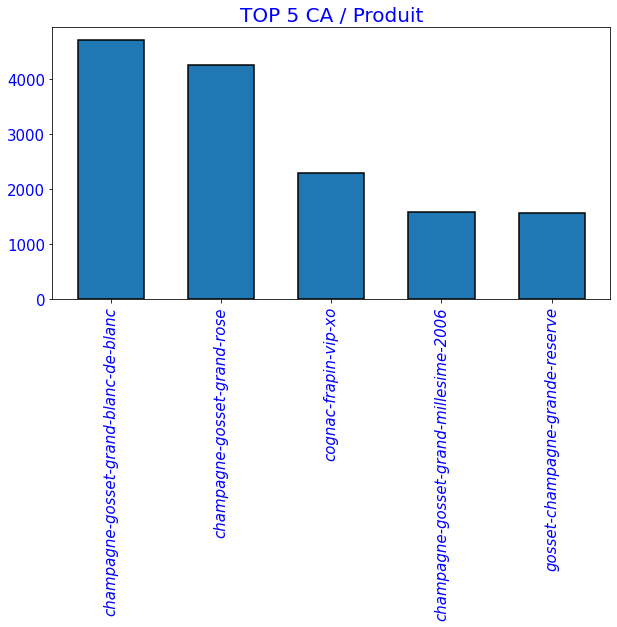

In [41]:
height = (df_final_top_sale['ca_produit'])
bars = (df_final_top_sale['post_name'])
x_pos = np.arange(len(bars))
plt.figure(figsize=(10,5))
plt.bar(x_pos, height,  edgecolor = 'black', width = 0.6, linewidth = 1.5, )
plt.xticks(x_pos, bars, color = 'blue', rotation=90, fontsize = 15, style = 'italic',)
plt.yticks(color = 'blue', fontsize = 15)
plt.title('TOP 5 CA / Produit', color ='blue', fontsize = 20)
plt.show()

Ont constate maintenant qu'il y'a 2 produits qui réalisent réalisent la quasi totalité du chiffre d'affaire.

### Deuxième Intérrogation : Afficher le total du chiffre d’affaires réalisé en ligne.

Pour cela je créer un champ **'ca_produit_web'** en multipliant le prix par les vente en ligne.

In [42]:
df_final['ca_produit_web'] = df_final['price'] * df_final['onsale_web']
df_final

,product_id,onsale_web,price,id_web,total_sales,post_name,ca_produit,ca_produit_web
0,4954,1,25.0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros,250.0,25.0
1,3847,1,24.2,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,145.2,24.2
2,3849,1,34.3,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,0.0,34.3
3,3850,1,20.8,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,0.0,20.8
4,4032,1,14.1,19814,3.0,pierre-jean-villa-igp-gamine-2018,42.3,14.1
...,...,...,...,...,...,...,...,...
710,6930,1,8.4,16135,5.0,mouthes-le-bihan-aime-chai-2015,42.0,8.4
711,7023,1,27.5,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018,0.0,27.5
712,7025,1,69.0,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018,0.0,69.0
713,7247,1,54.8,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,0.0,54.8


Ensuite je calcule le **C.A** totale :

In [43]:
ca_total = df_final['ca_produit'].sum()
ca_total

70568.6

Le chiffre d'affaire total est de **70568,6 euro**.

Ensuite je calcule le Chiffre d'affaire en ligne : 

In [44]:
ca_web = df_final['ca_produit_web'].sum()
ca_web

23200.1

Le chiffre d'affaire en ligne est de **23200,1** euro.

Par simple soustraction je calcule le chiffre d'affaire hors vente web : 

In [45]:
ca_hors_web = ca_total - ca_web
ca_hors_web

47368.50000000001

Le chiffre d'affaire hors vente web est de **47368,5 euro**.

Toujour en utilisant la librairie **MATPLOTLIB** j'affiche une **PIE CHART** pour représenter les ventes :

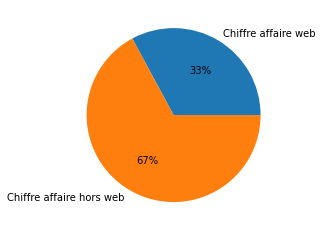

In [46]:
chiffre_affaire = [ca_web,ca_hors_web]
labels = ['Chiffre affaire web','Chiffre affaire hors web']
plt.pie(chiffre_affaire,labels = labels,autopct = '%0.f%%')
plt.show()

Ont constate que les ventes en ligne représente **33% du chiffre d'affaire totale**.

### Troisième Intérrogation : Effectues une analyse sur les prix des produits afin de détecter d’éventuelles valeurs aberrantes.

Pour répondre à cette intérrgation j'utiliserai en premier un **BOXPLOT** via la librairie **SEABORN** : 

C:\Users\chthioub\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Tableau des potentielles valeurs Aberenttes')

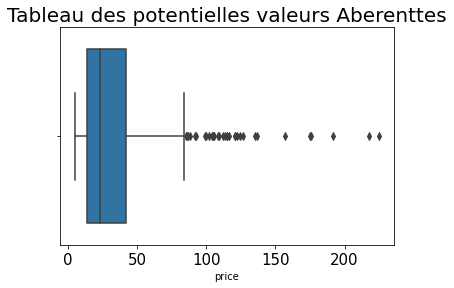

In [47]:
sns.boxplot(df_final['price'])
plt.xticks(fontsize = 15,)
plt.title('Tableau des potentielles valeurs Aberenttes', color ='black', fontsize = 20)

Maitnenant que notre **boxplot** est afficher deux solutions s'offre a nous : 
* Numéro 1 : Partir du principe que les valeurs potentiellement abérrantes se situe aux alentour des 80 euro, et pour cela j'applique un filtre sur le champs **'price'** pour n'afficher que les produits supèrieure ou égale a 80 euro.

In [48]:
filtre_prix_aberrant = df_final['price'] >= 80
df_final_price_aberant = df_final[filtre_prix_aberrant]
df_final_price_aberant

,product_id,onsale_web,price,id_web,total_sales,post_name,ca_produit,ca_produit_web
11,4046,1,80.0,15269,6.0,pierre-gaillard-cote-rotie-rose-pourpre-2017,480.0,80.0
64,4115,1,100.0,15382,0.0,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,0.0,100.0
66,4132,1,88.4,11668,0.0,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,0.0,88.4
178,4055,0,86.1,NaN,NaN,NaN,NaN,0.0
198,4337,1,83.0,4679,0.0,champagne-mailly-grand-cru-les-echansons-2007,0.0,83.0
201,4352,1,225.0,15940,5.0,champagne-egly-ouriet-grand-cru-millesime-2008,1125.0,225.0
203,4355,1,126.5,12589,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,1391.5,126.5
207,4359,1,85.6,13853,1.0,champagne-larmandier-bernier-grand-cru-vieille...,85.6,85.6
220,4402,1,176.0,3510,13.0,cognac-frapin-vip-xo,2288.0,176.0
221,4404,1,108.5,3507,2.0,cognac-frapin-fontpinot-xo,217.0,108.5


In [49]:
df_final_price_aberant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 11 to 658
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      36 non-null     int64  
 1   onsale_web      36 non-null     int64  
 2   price           36 non-null     float64
 3   id_web          35 non-null     object 
 4   total_sales     35 non-null     float64
 5   post_name       35 non-null     object 
 6   ca_produit      35 non-null     float64
 7   ca_produit_web  36 non-null     float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.5+ KB


Avec cette méthode nous constatons que **36** produits dépasse cette valeur, mais après une recherche sur internet et au vu du type de produit et de leur prix je ne pense pas que ces valeurs soit abérrantes : 
<br>Exemple 1 : Champagne Egly Ouriet grand cru millesime 2008 prix 225 euro prix, trouver sur internet 229 euro.	

* Numéro 2 : Caluler la valeur "potentiellement" abérrantes et appliquer un filtre avec cette valeur calculée :  

Repérage numérique des valeurs dite abérrantes :

In [50]:
Q1 = df_final['price'].quantile(q=0.25, interpolation='midpoint')
Q3 =  df_final  ['price'].quantile(q=0.75, interpolation='midpoint')

Définition de l'écart **quartile/quantile** : 

In [51]:
IQR = Q3 - Q1

Calcule des **limites inférieure et supérieure** d'une valeur "dite" abérrante : 

In [52]:
limite_inf_outliers= Q1-1.5*IQR
limite_sup_outliers= Q3+1.5*IQR
print(limite_sup_outliers)

84.35000000000001


Après calcule je trouve comme valeur **84,35** ( pas loin de nos **80** de base).

Application du filtre avec la nouvelle valeur : 

In [53]:
filtre_prix_aberrant2 = df_final['price'] >= 84.35
df_final_price_aberant2 = df_final[filtre_prix_aberrant2]
df_final_price_aberant2

,product_id,onsale_web,price,id_web,total_sales,post_name,ca_produit,ca_produit_web
64,4115,1,100.0,15382,0.0,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,0.0,100.0
66,4132,1,88.4,11668,0.0,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,0.0,88.4
178,4055,0,86.1,NaN,NaN,NaN,NaN,0.0
201,4352,1,225.0,15940,5.0,champagne-egly-ouriet-grand-cru-millesime-2008,1125.0,225.0
203,4355,1,126.5,12589,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,1391.5,126.5
207,4359,1,85.6,13853,1.0,champagne-larmandier-bernier-grand-cru-vieille...,85.6,85.6
220,4402,1,176.0,3510,13.0,cognac-frapin-vip-xo,2288.0,176.0
221,4404,1,108.5,3507,2.0,cognac-frapin-fontpinot-xo,217.0,108.5
223,4406,1,157.0,7819,0.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans,0.0,157.0
224,4407,1,104.0,3509,1.0,cognac-frapin-cigar-blend,104.0,104.0


In [54]:
df_final_price_aberant2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 64 to 658
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      33 non-null     int64  
 1   onsale_web      33 non-null     int64  
 2   price           33 non-null     float64
 3   id_web          32 non-null     object 
 4   total_sales     32 non-null     float64
 5   post_name       32 non-null     object 
 6   ca_produit      32 non-null     float64
 7   ca_produit_web  33 non-null     float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.3+ KB


Il ne reste que **33** produit avec des valeures "dites" comme abérrante, mais comme précédament les prix semble cohérent au vu des produits vendu.
<br>Exemple 2 : David Duband Charmes Chambertin grand cru 2014 prix 217,5 euro, prix sur internet 219 euro.